# Problem Set 5, due June 4 at 5:30 pm.

As usual, you are highly encouraged to *start this problem set early!*  My best guess (no guarantees!) is that Part 1 will be conceptually easy but perhaps time consuming.  Parts 2 and 3 are medium difficult, but there are plenty of opportunities to get confused with python data structures, so if you're going to get stuck, get stuck (and unstuck) early! Part 4 will give you an opportunity to get some intuition with PCA.

Note that the two extra credit problems have the potential to be quite challenging and time consuming. Make sure to do everything else in the problem set before you tackle the extra credit.

To get started, download the files "reviews.csv" and "movies.dat" from Canvas.

For this assignment, the following libraries may be useful:

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [scikit-learn](http://scikit-learn.org/stable/), for machine learning
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

In particular, I suggest you familiarize yourself with the following aspects of these libraries, which are not required but which might make your life easier:

* `DataFrame` and other basic [data structures](http://pandas.pydata.org/pandas-docs/stable/dsintro.html) in pandas
* [`groupby`](http://pandas.pydata.org/pandas-docs/stable/groupby.html), `unique`,  and other simple aggregation functions
* [`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for working with text in sklearn.
* [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) for Naive Bayes
* Simple tools for [Cross-Validation](http://scikit-learn.org/stable/modules/cross_validation.html) in sklearn

Make sure they load properly with the following code block:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#hint: Consult the scikit-learn documentation to
#      learn about what these classes do do
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Introduction to the assignment

In this assignment, you'll be analyzing movie reviews in an attempt to determine whether movies are good or bad.  I've downloaded a large number of movie reviews from the [Rotten Tomatoes](http://www.rottentomatoes.com) website, which are available in the file "reviews.csv" on Canvas.  I've also put a file "movies.dat" on Canvas that contains metadata for ~65,000 different movies

If you've never seen Rotten Tomatoes before, go spend a few minutes familiarizing yourself with the website.  It's a meta-review website that aggregates movie reviews from a large number of critics.  Here's what the page for this year's likely [Oscar winner](http://www.rottentomatoes.com/m/the_revenant_2015/) looks like.  Note in particular the section on "Critic Reviews" at the bottom -- that's the content that has been scraped and put in the reviews.csv file.  Also note that each movie is given a quantitative score on the Tomatometer which is used to classify the movie as either Fresh (good) or Rotten (bad).

Your mission is to develop a classifier to determine whether a movie is Fresh or Rotten based on the contents of the reviews given to the movie.  As usual, we'll start out with some exploratory data analysis.

---

## Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  Begin by loading the datasets and dropping rows that have missing data:

In [2]:
reviews = pd.read_csv('reviews.csv')
movies = pd.read_csv("movies.dat", delimiter='\t')

reviews = reviews[~reviews.quote.isnull()]
reviews = reviews[reviews.fresh != 'none']
reviews = reviews[reviews.quote.str.len() > 0]

In [3]:

print(movies.columns)
print(reviews.columns)

Index(['id', 'title', 'imdbID', 'spanishTitle', 'imdbPictureURL', 'year',
       'rtID', 'rtAllCriticsRating', 'rtAllCriticsNumReviews',
       'rtAllCriticsNumFresh', 'rtAllCriticsNumRotten', 'rtAllCriticsScore',
       'rtTopCriticsRating', 'rtTopCriticsNumReviews', 'rtTopCriticsNumFresh',
       'rtTopCriticsNumRotten', 'rtTopCriticsScore', 'rtAudienceRating',
       'rtAudienceNumRatings', 'rtAudienceScore', 'rtPictureURL'],
      dtype='object')
Index(['critic', 'fresh', 'imdb', 'link', 'publication', 'quote',
       'review_date', 'rtid', 'title'],
      dtype='object')


### 1.1: Basic features of the dataset

Answer the following questions by having your python code directly print the answers:

* How many unique reviews (quotes) are in the `reviews` dataset?
* How many unique reviewers (critics) are in the `reviews` dataset?
* How many unique movies are in the `reviews` dataset?
* How many unique movies are in the *`movies`* dataset?
* How many different publications have reviews in the `reviews` dataset?


In [4]:
# enter your code below

print ("Number of reviews: %i" % len(reviews))
print ("Number of critics: %i" % len(set(reviews['critic'])))
print ("Number of movies in reviews dataset: %i" % len(set(reviews['title'])))
print ("Number of movies in movies dataset: %i" % len(set(movies['title'])))
print ("Number of publications in reviews: %i" % len(set(reviews['publication'])))



Number of reviews: 13419
Number of critics: 541
Number of movies in reviews dataset: 1720
Number of movies in movies dataset: 9405
Number of publications in reviews: 64


### 1.2 Number of reviews per reviewer

Using the `reviews` dataset, create a histogram showing the distribution of the number of reviews per reviewer.  Create the bin width (x-axis) to be 1 unit wide, and the range of the axis to be from 0 to 30.  Scale the y-axis to show the logarithm of (count of) the number of reviews.  Label your axes and make your histogram look professional.

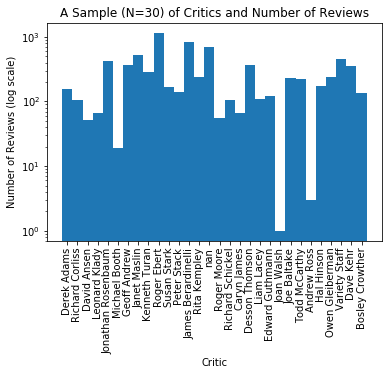

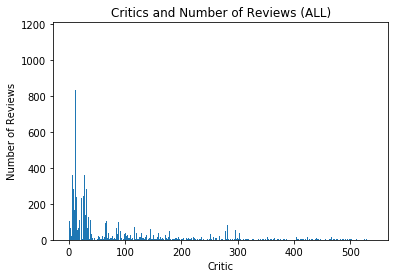

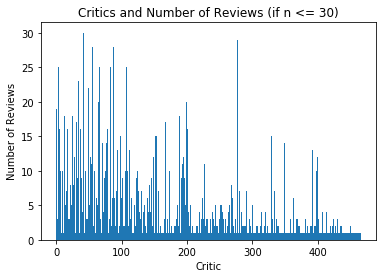

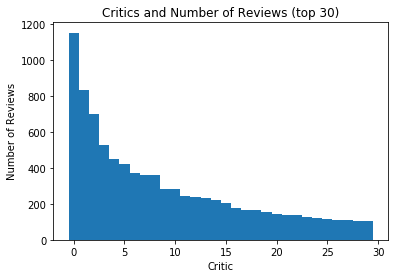

In [5]:
# enter your code here
from collections import Counter

#sample of 30 reviewers and their number of reviews
labels, values = zip(*Counter(reviews['critic']).items())
indexes = np.arange(30)
width = 1


fig, ax = plt.subplots()   

plt.bar(indexes, values[0:30], width)
plt.xticks(indexes, labels[0:30],rotation=90)
ax.set_yscale('log')
ax.set_ylabel('Number of Reviews (log scale)')
ax.set_xlabel('Critic')
ax.set_title('A Sample (N=30) of Critics and Number of Reviews')
plt.show()


fig, ax = plt.subplots()   
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
ax.set_ylabel('Number of Reviews')
ax.set_xlabel('Critic')
ax.set_title('Critics and Number of Reviews (ALL)')
plt.show()

reviews_reviewer = Counter(reviews['critic'])
reviews_under_30 = {k:v for (k,v) in reviews_reviewer.items() if v<31}
labels, values = zip(*reviews_under_30.items())


fig, ax = plt.subplots()   
indexes = np.arange(len(labels))
width = 1
#alternatively, here is the reviewers with less than 30 reviews. I wasn't sure how to interpret the question
plt.bar(indexes, values, width)
ax.set_ylabel('Number of Reviews')
ax.set_xlabel('Critic')
ax.set_title('Critics and Number of Reviews (if n <= 30)')
plt.show()


#and finally here's the fourth interpretation
sorted_reviewers = reviews_reviewer.most_common(30)
labels, values = zip(*sorted_reviewers)

fig, ax = plt.subplots()   
indexes = np.arange(30)
width = 1
#alternatively, here is the reviewers with less than 30 reviews. I wasn't sure how to interpret the question
plt.bar(indexes, values, width)
ax.set_ylabel('Number of Reviews')
ax.set_xlabel('Critic')
ax.set_title('Critics and Number of Reviews (top 30)')
plt.show()



### 1.3 Zoom in on a few reviewers
Find the 30 critics with the most reviews, and list their names in a table along with (a) the name of the publication they work for, (b) the date of their first review, and (c) the date of their last review

*hint: use the groupby function to do this quickly*

In [6]:
# enter your code here
top_30 = reviews.groupby(['critic'],as_index=False).count()
#print(top_30)
top_30 = top_30.nlargest(30,'publication')
for t in top_30['critic']:
    print(t+ " : First Review: " ,min(reviews['review_date'][reviews['critic']==t])+"  Last Review: ",max(reviews['review_date'][reviews['critic']==t])+" Publication(s): ",set(reviews['publication'][reviews['critic']==t]),"\n --------------------------------------------------------------------------------------------------------------------")


Roger Ebert : First Review:  2000-01-01 00:00:00  Last Review:  2013-06-11 00:00:00 Publication(s):  {'Chicago Sun-Times', 'At the Movies'} 
 --------------------------------------------------------------------------------------------------------------------
James Berardinelli : First Review:  1800-01-01 00:00:00  Last Review:  2012-02-07 00:00:00 Publication(s):  {'ReelViews'} 
 --------------------------------------------------------------------------------------------------------------------
Janet Maslin : First Review:  2000-01-01 00:00:00  Last Review:  2010-09-07 00:00:00 Publication(s):  {'New York Times'} 
 --------------------------------------------------------------------------------------------------------------------
Variety Staff : First Review:  2001-02-13 00:00:00  Last Review:  2012-08-15 00:00:00 Publication(s):  {'Variety'} 
 --------------------------------------------------------------------------------------------------------------------
Jonathan Rosenbaum : First

### 1.4 Ratings over time

Using the `movies` dataset, create a plot that shows how the average rating per movie (rtAllCriticsRating) has evolved over time.  Do this by creating a scatterplot where the x-axis is the year in which the movie was released and the y-axis is rtAllCriticsRating.  Drop movies with 0 or unknown values to avoid biasing your results.  Then, create a scatterplot that has one <year,rating> point for each remaining movie, and pick an appropriate size/color/transparency for these points to ensure that the graph looks professional.  In other words, do not simply use the default settings, as this will produce a dense mess of dots that will be hard to interpret.  Finally, overlay on this scatterplot a line graph in orange showing how the average movie rating (the average of rtAllCriticsRating across all movies in a year) has changed over time.  Do you notice a trend?  What do you think it means?

C:\Users\jennareg\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Text(0.5, 1.0, 'Mean Ratings by Year')

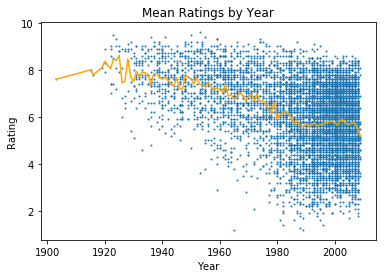

In [7]:

movies_clean = movies[movies.rtAllCriticsRating!="0"]

movies_clean.rtAllCriticsRating = pd.to_numeric(movies_clean.rtAllCriticsRating,errors='coerce')
rate_by_year = pd.DataFrame(movies_clean.groupby(by=["year"],as_index=False)['rtAllCriticsRating'].mean())
plt.scatter(movies_clean['year'],movies_clean['rtAllCriticsRating'],s=1)
plt.plot(rate_by_year['year'],rate_by_year['rtAllCriticsRating'],color="orange")
plt.ylabel("Rating")
plt.xlabel("Year")
plt.title("Mean Ratings by Year")


Looks like ratings are going way down on average! Perhaps this is because there are more movies and more reviewers and more ways to distribute those reviews.

---

## Part 2: Naive Bayes

Now it gets fun!  You are going to use a [Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) to build a prediction model for whether a review is fresh or rotten, depending on the text of the review. Review the assigned readings on Canvas, as well as the relevant lecture notes before embarking on this journey.

### Using CountVectorizer

One thing that may help you in the following problems is the [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) object in Scikit-learn.  This will help you convert your raw text fields into "bag of words" vectors, i.e. a data structure that tells you how many times a particular word appears in a blurb.  Here's a simple example, make sure you understand what's going on!

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

text = ['machine learning rocks', 'machine learning rules', 'rocks rocks rules']
print ("Original text is\n", '\n'.join(text))

vectorizer = CountVectorizer(min_df=0)

# call `fit` to build the vocabulary
vectorizer.fit(text)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()

print
print ("Transformed text vector is \n", x)

# `get_feature_names` tracks which word is associated with each column of the transformed x
print
print ("Words for each feature:")
print (vectorizer.get_feature_names())

Original text is
 machine learning rocks
machine learning rules
rocks rocks rules
Transformed text vector is 
 [[1 1 1 0]
 [1 1 0 1]
 [0 0 2 1]]
Words for each feature:
['learning', 'machine', 'rocks', 'rules']


### 2.1 Create your X input and Y output

Using the `reviews` dataframe, compute a pair of numerical X, Y arrays where:
    
 * X is a `(nreview, nwords)` array. Each row corresponds to a bag-of-words representation for a single review. This will be the *input* to your model.
 * Y is a `nreview`-element 1/0 array, encoding whether a review is Fresh (1) or Rotten (0). This is the desired *output* from your model.
 
Make sure to remove items with no review text

In [9]:
"""
Function
--------
make_xy

Build a bag-of-words training set for the review data

Parameters
-----------
reviews : Pandas DataFrame
    The review data from above
    
vectorizer : CountVectorizer object (optional)
    A CountVectorizer object to use. If None,
    then create and fit a new CountVectorizer.
    Otherwise, re-fit the provided CountVectorizer
    using the reviews data
    
Returns
-------
X : numpy array (dims: nreview, nwords)
    Bag-of-words representation for each review.
Y : numpy array (dims: nreview)
    1/0 array. 1 = fresh review, 0 = rotten review

Examples
--------
X, Y = make_xy(reviews)
"""
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
def get_matrix(df,min_df=1):
    messages = [m for m in df['quote']]
    labels = [l for l in df['label']]
    from sklearn.feature_extraction.text import CountVectorizer
    count_vec = CountVectorizer(min_df=min_df)

    count_vec.fit(messages)
    count_vec.get_feature_names()
    docs = count_vec.transform(messages)
    sum_words = docs.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     count_vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    docs = docs.toarray()
    freqs = pd.DataFrame(docs, columns = count_vec.get_feature_names())
    return freqs,labels


def print_scores(test, pred):
    print(metrics.recall_score(test,pred, average='weighted'))
    print(metrics.precision_score(test,pred, average='weighted'))
    print(metrics.accuracy_score(test,pred))
    print(metrics.classification_report(test,pred))

In [10]:
#print(reviews['quote'],reviews['fresh'])
quotes = reviews['quote']

labels = reviews['fresh']
quote_and_label = pd.DataFrame({'quote': quotes,'label':labels})
quote_and_label.head()

,quote,label
0,"So ingenious in concept, design and execution ...",fresh
1,The year's most inventive comedy.,fresh
2,A winning animated feature that has something ...,fresh
3,The film sports a provocative and appealing st...,fresh
4,"An entertaining computer-generated, hyperreali...",fresh


In [11]:
X, Y = get_matrix(quote_and_label)


### 2.2 Test-Train split

Next, randomly split the data into two groups: a training set and a validation set.  You can do this manually, as you did in the prior problem set.  Or, use [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) to do this auto-magically.  See [this guide](http://scikit-learn.org/stable/modules/cross_validation.html) for a simple example of how `train_test_split` works.

In [12]:
#my train-test-split is actually done in my entire run_NaiveBayes function (see below)

### 2.3 Naive Bayes with `MultinomialNB`
Use the training set to train a Naive Bayes classifier using the [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)
 object.  Report the accuracy of this model on both the training and testing data.  What do you observe?  Interpret these results!

*Hint: This shouldn't take more than 5-10 lines of code to accomplish*



['fresh' 'fresh' 'rotten' ... 'fresh' 'fresh' 'fresh']
0.7836065573770492
0.7799101258047938
0.7836065573770492
              precision    recall  f1-score   support

       fresh       0.81      0.87      0.84      2143
      rotten       0.73      0.63      0.68      1212

   micro avg       0.78      0.78      0.78      3355
   macro avg       0.77      0.75      0.76      3355
weighted avg       0.78      0.78      0.78      3355



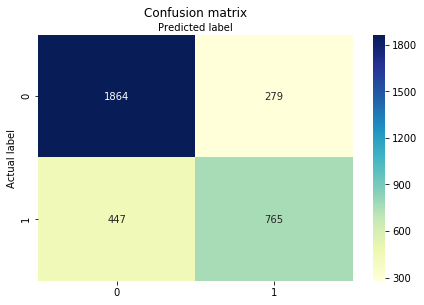

In [13]:
def run_NB(df,freqs,labels,alpha=1.0,print_this=True):
    X_train, X_test, y_train, y_test = train_test_split(freqs,labels,test_size=0.25) 
    NB = MultinomialNB(alpha=alpha)
    fitted = NB.fit(X_train,y_train)
    predictions = fitted.predict(X_test)
    print(predictions)
    zipped = zip(X_test,predictions)
    if print_this==True:
        print_scores(y_test,predictions)
        cnf_matrix = metrics.confusion_matrix(y_test, predictions)
        cnf_matrix

        class_names=[0,1] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
    return(predictions,X_test,y_test,fitted,zipped)


predictions=run_NB(quote_and_label,X,Y)

We did okayish. 77% is alright for the fact that the quotes are so short and the data is so "sentimental"/nuanced. But we still have lots of mislabeling. These errors are addressed later in the section about "Why Naive Bayes Makes Mistakes" that I wrote

### 2.4 (EXTRA CREDIT) Naive Bayes from Scratch!
That was almost too easy, right?  Right.

Your next mission, should you choose to accept it, is to write your own Naive Bayes classifier without relying on `MultinomialNB` or a similar pre-written package.  In addition to the lecture notes and assigned readings, I highly recommend that you review Michael Collin’s lecture notes on Naïve Bayes before starting (available on Canvas).  

**Note:**
You should do this extra credit assignment *after* you have finished the rest of the problem set.  It is very rewarding, but can also be quite time-consuming!

*Hint: You will benefit most from this exercise if you attempt to write the algorithm directly from the lecture notes.  That said, if you really get stuck, Krishnamurthy Viswanathan has written a simple version of [NB in python](http://ebiquity.umbc.edu/blogger/2010/12/07/naive-bayes-classifier-in-50-lines/), which you can peek at if you really get stuck.*

In [14]:
# Your code here

---

## Part 3: Evaluation

### 3.1 Estimate the likelihood of your data

Given a fitted model, you can compute the log-likelihood of your data as a way to assess the performance of your model.  Using `fitted_model.predict_logproba`, the idea is to write a function that computes the log-likelihood of a dataset, so that we can inspect the log-likelihood of your training and testing data given your fitted model from part 2.

To help you out a little bit, we'll do this part for you. But make sure you understand it, because you'll need to use this later!

In [15]:
"""
Function
--------
log_likelihood

Compute the log likelihood of a dataset according to a bayesian classifier. 
The Log Likelihood is defined by

L = Sum_fresh(logP(fresh)) + Sum_rotten(logP(rotten))

Where Sum_fresh indicates a sum over all fresh reviews, 
and Sum_rotten indicates a sum over rotten reviews
    
Parameters
----------
model : Bayesian classifier
x : (nexample, nfeature) array
    The input data
y : (nexample) integer array
    Whether each review is Fresh
"""

def log_likelihood(model, x, y):
    prob = model.predict_log_proba(x)
    rotten = y == 0
    fresh = ~rotten
    return prob[rotten, 0].sum() + prob[fresh, 1].sum()

# output the likelihood of your test data (example - you may need to 
# chance the names of the variables below to match your code in 2.2 and 2.3
xtest=predictions[1]
ytest=predictions[2]
fitted_model = predictions[3]
log_likelihood(fitted_model, xtest, ytest)

-5.397526431028751

### 3.2 Cross-Validation

Why do we care about the log-likelihood of our data?  You guessed it: Cross-Validation.

Our classifier has a few hyperparameters. The two most important are:

 1. The `min_df` keyword in `CountVectorizer`, which will ignore words which appear in fewer than `min_df` fraction of reviews. Words that appear only once or twice can lead to overfitting, since words which occur only a few times might correlate very well with Fresh/Rotten reviews by chance in the training dataset.
 
 2. The [`alpha` keyword](http://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) in the Bayesian classifier is a "smoothing parameter" -- increasing the value decreases the sensitivity to any single feature, and tends to pull prediction probabilities closer to 50%. 

How are we are going to use cross-validation to tune these hyperparameters?  The objective function we want to maximize is the log-likelihood of our data.  Fill in the remaining code in this block, to loop over many values of `alpha` and `min_df` to determine
which settings are "best" in the sense of maximizing the cross-validated log-likelihood.

*hint: sklearn has a built-in function, `sklearn.cross_validation.cross_val_score`, that might save you a lot of time here...*

In [16]:
%%capture
from sklearn.model_selection import cross_val_score
#the grid of parameters to search over
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
max_loglike = -np.inf

for alpha in alphas:
    for min_df in min_dfs:         
              
        X, Y = get_matrix(quote_and_label,min_df)
        predictions = run_NB(quote_and_label,X,Y,alpha,print_this=False)
        xtest=predictions[1]
        ytest=predictions[2]
        fitted_model = predictions[3]
        
        #ll = log_likelihood(fitted_model,xtest,ytest)
        ll= metrics.accuracy_score(ytest,predictions[0])
        if ll > max_loglike:
            max_loglike = ll
            best_alpha=alpha
            best_min_df=min_df

        
        
        
        
        #your code here

In [17]:
# I know I had issues with the log likelihood but it was coming out with really bad accuracies and I was confused. 
# I reverted to using accuracy instead and finding the best accuracy
print(max_loglike,best_alpha,best_min_df)


0.7836065573770492 1 0.0001


### 3.3 Putting it together

Now that you've determined values for alpha and min_df that optimize the cross-validated log-likelihood, repeat the steps in 2.1-2.3 to train a final classifier with these parameters and re-evaluate the accuracy.  Discuss the various ways in which Cross-Validation has affected the model. Is the new model more or less accurate? Is overfitting better or worse?

['fresh' 'fresh' 'rotten' ... 'fresh' 'fresh' 'fresh']
0.7597615499254844
0.7598397494755321
0.7597615499254844
              precision    recall  f1-score   support

       fresh       0.81      0.81      0.81      2104
      rotten       0.68      0.68      0.68      1251

   micro avg       0.76      0.76      0.76      3355
   macro avg       0.74      0.74      0.74      3355
weighted avg       0.76      0.76      0.76      3355



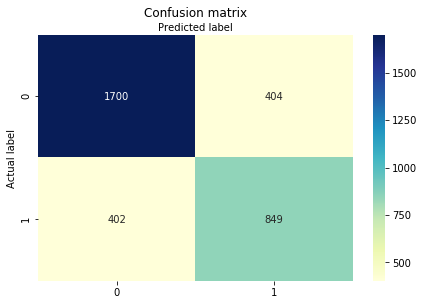

In [18]:
X, Y = get_matrix(quote_and_label,best_alpha)
predictions = run_NB(quote_and_label,X,Y,min_df)

*I struggled with getting the log likelihood to work and was getting really crappy performance. So I went with accuracy instead and ended up with a slightly better job than the un-tuned Naive Bayes (which is what one would expect!) It's still not amazingly better though, and that's because the hyperparameters still don't get at what makes Naive Bayes __Naive__ in the first place; its independence assumptions. Now, in practice, it still does nicely. And tuning the hyperparameters can help. But given the sparse-ish review data (each review quote is only a few sentences) and the difficulty of English language features, we just couldn't do that much better*

### 3.4 (Extra Credit)

What happens if you tried this again using a function besides the log-likelihood -- for example, the classification accuracy?  Interpret these results

In [19]:
#Enter your code here

*enter your observations here*

### 3.5 Interpretation

What words best predict a fresh or rotten review?  Using your classifier and the `vectorizer.get_feature_names` method, determine which words best predict a positive or negative review. Print the 10 words that best predict a "fresh" review, and the 10 words that best predict a "rotten" review. For each word, what is the model's probability of freshness if the word appears one time?

#### Hints
* In thinking about how to measure the impact of a word on freshness rating, consider computing the classification probability for a feature vector which consists of all 0s, except for a single 1. What does this probability refer to?
* `numpy.identity` generates an identity matrix, where all values are zero except the diagonal elements which have a value of one

['fresh' 'rotten' 'fresh' ... 'rotten' 'rotten' 'fresh']
0.7651266766020864
0.7630854919382122
0.7651266766020864
              precision    recall  f1-score   support

       fresh       0.80      0.83      0.81      2085
      rotten       0.70      0.66      0.68      1270

   micro avg       0.77      0.77      0.77      3355
   macro avg       0.75      0.75      0.75      3355
weighted avg       0.76      0.77      0.76      3355

[ 5960  7770  5040 10831   589  9299  3642  7409  7179 10945 11975  3105
  3544  7181  7769 10791  4381  4045  6211  1022  1762 10771  6485  7226
 11704 11524 10203  6490   240 11431 11965 11815  7858 11739  6448  9898
  4075 11743 11861  4725  5889  6637  7013  4393  2980  3636  7005  7485
 11821 11403 11788  2066  7446 10880  5675 10786  1571  5300 11834  6230
  1098 10240  4964 11808  4641  4955  9853 10759  4355   164   777  6955
   428   657  6973  7267   988  5099 12051  1530  7404  7407  4938  5752
   511  4213  6998  1518 10807  4037 11915   721

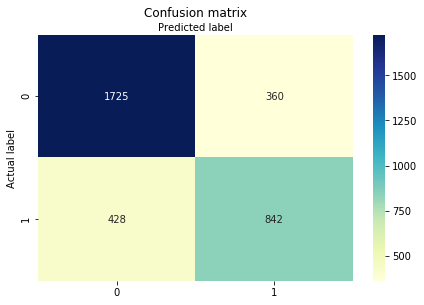

In [20]:
# Enter your code here

def print_top10(vectorizer, classifier):
    """Prints features with the highest coefficient values, per class"""
    
    feature_names = vectorizer.get_feature_names()
    
    top10_fresh = np.argsort(classifier.feature_log_prob_[0])[-100:]
    print(top10_fresh)
    print(" ".join(feature_names[j] for j in top10_fresh))
    top10_rotten = np.argsort(classifier.feature_log_prob_[1])[-100:]
    print(top10_rotten)
    print(" ".join(feature_names[j] for j in top10_rotten))
    
    
    


df = quote_and_label
messages = [m for m in df['quote']]
labels = [l for l in df['label']]
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(min_df=.0001)

count_vec.fit(messages)
docs = count_vec.transform(messages)
sum_words = docs.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     count_vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
docs = docs.toarray()
freqs = pd.DataFrame(docs, columns = count_vec.get_feature_names())

predictions = run_NB(quote_and_label,freqs,labels)
print_top10(count_vec,predictions[3])

*Once I finally got this working, it was so interesting!*
I decided to use more than the first top 10 because there was more *content* in the top 100. 'Positive' words (words leading to a 'fresh' review) included things like: __american__, __love__, __entertaining__,__like__,__best__,__good__.
'Negative' words (words leading to a 'rotten' review) included things like: __work__,__might__,__any__,__seems__, __never__, __bad__, __little__, __only__, __no__, __not__.

These actually make sense! I was so happy to see a teeny bit of interpretability to all of this!

### 3.6 Error Analysis

One of the best sources for inspiration when trying to improve a model is to look at examples where the model performs poorly.  Find 5 fresh and rotten reviews where your model performs particularly poorly. Print each review.

What do you notice about these mis-predictions? Naive Bayes classifiers assume that every word affects the probability independently of other words. In what way is this a bad assumption? In your answer, report your classifier's Freshness probability for the review "This movie is not remarkable, touching, or superb in any way".

In [21]:
count = 0
list_indexes = []
for i,f in enumerate(predictions[1].iloc[696]):
    if f==1:
        count+=1
        list_indexes.append(i)

for val in list_indexes:
    print(predictions[1].columns[val])

at
best
burlesque
but
clever
feet
literary
on
quick
remarkably
romantic
when


In [22]:
%%capture
#okay what we want is to see where xtest actually predicted incorrectly
#here are ALL the ones that got mislabeled (though the words print out as in alphabetical which makes it hard to read the actual review)
# so then I find it in the big dataset and do a small qualitative analysis of what made these so difficult to predict
mislabel = []
for i,pred in enumerate(predictions[0]):
    if pred!=ytest[i]:
        mislabel.append(i)
for m in mislabel:
    print(predictions[1].iloc[m][predictions[1].iloc[m]==1],ytest[m])


In [23]:
# I used this to find some of the full reviews so I could read them in order, as in the code above 
#the words print out in alphabetical order and without stop words so it's hard to get a qualitative sentiment from them
for i,q in quote_and_label.iterrows():
    if "lament" in q['quote']:
        print(q['quote'],q['label'])
        
for i,q in quote_and_label.iterrows():
    if "Japanese" in q['quote']:
        print(q['quote'],q['label'])
        
for i,q in quote_and_label.iterrows():
    if "deafening" in q['quote']:
        print(q['quote'],q['label'])

It's bad enough that writer-director David Ross indulges in the very perverse kind of Lolita-tinged titillation the film pretends to lament, but then he ties everything up with an oh-well shrug. rotten
Instead of bathing his story in the warm, lyrical glow of an Irish lament, Jordan mixes domestic tragedy with fierce gallows humor and the stark horror of a Goya painting. fresh
This is one of the best films of the year, an unflinching lament for the human condition. fresh
Not a vicious denial of the legitimacy of revolt (as too many critics have charged) but a bitter lament over the disservice revolutionaries do their revolutions. fresh
As for the conflict, it's hardly riveting and often it's downright silly. The sets and effects betray their downsized budget. And the Japanese bashing is less artful than in Rising Sun, though just as obnoxious. rotten
Takes a small, exquisite Japanese movie and turns it into a big, stupid American movie. Still, it must be said that as glossy and overpro

A deafening sonic yawn signs off this desperate finale to Universal's Arthur Hailey-inspired quartet of in-flight entertainments rotten

A stylish Hollywood remake of the Japanese horror sensation that unfortunately has little personality of its own. rotten

## Why Naive Bayes Makes Mistakes

Okay, let's talk a little bit about how and why Naive Bayes makes the mistakes that it does. First line of defense is simply considering what makes it into the training vs. test data. Let's take the above example of the word "lament". Perhaps the one quote with "lament" that made it into the training data was the rotten one! If the others are in the testing data, they will be more likely to be labeled as rotten even if they are fresh.

Beyond that, it's really the independence assumption that gets us. Let's think about this. The fact that a sentence contains "not" *will* affect the probability that it is a 'rotten' review, but it might get trumped by the fact that it also contains the words "spectacular, superb, amazing" such as "this movie is not spectacular, superb, or amazing at all". The "not" will get some fraction of the probability towards 'rotten', but the words 'spectacular, superb, amazing' will make the message more likely to be labeled as 'fresh' overall.

Digging into some of the phrases that get mislabeled, here is a few examples. What I notice from ones like this first one is that they are *highly* metaphorical. 

### "A deafening sonic yawn signs off this desperate finale to Universal's Arthur Hailey-inspired quartet of in-flight entertainments" -- rotten

This is really difficult for Naive Bayes to "comprehend".

As for the next one, it's the kind of idea that I described with having some "positive" words and some "negative" words.

### "A stylish Hollywood remake of the Japanese horror sensation that unfortunately has little personality of its own." rotten

The words "stylish", "sensation", and "personality" probably trump the "unfortunately" and "little". Also, if most horror movies did really well (labeled 'fresh'), then the word "horror" will also make the entire review lean towards "fresh"

## Part 4: Principal Component Analysis

Just when you thought you were *finally* done with the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing), it has come back to haunt you for a few more minutes.  Make sure you're up and running as you were on the previous problem set:

In [24]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
bdata = load_boston()
data = pd.DataFrame(bdata.data)
data.columns=bdata.feature_names
data['TARGET']=bdata.target


### 4.1 Remember the last problem set?

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.  If you didn't get full credit for this on the first problem set, get full credit this time!

Then, just as you did on the previous problem set, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to regress median housing price on average number of rooms per house.  Use a training set consisting of 66% of your instances to fit your regression model.  Report the RMSE on the training and test set.

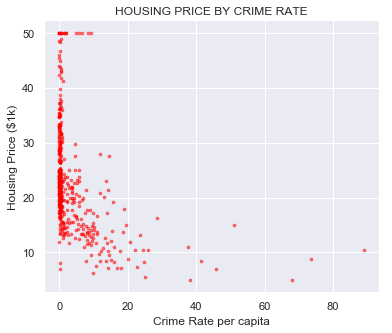

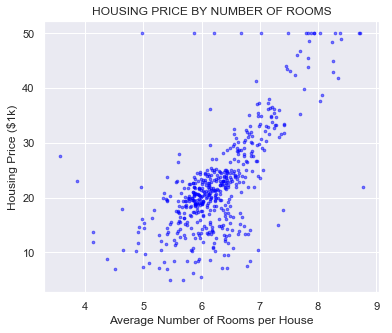

In [25]:
# Enter your code here
sns.set(rc={'figure.figsize':(6,5)})
plt.scatter(data.CRIM, data.TARGET, alpha=0.5,color="red",s=7.0)
plt.xlabel("Crime Rate per capita")
plt.ylabel("Housing Price ($1k)")
plt.title("HOUSING PRICE BY CRIME RATE")

plt.show()


plt.scatter(data.RM, data.TARGET, alpha=0.5,color="blue",s=7.0)
plt.xlabel("Average Number of Rooms per House")
plt.ylabel("Housing Price ($1k)")
plt.title("HOUSING PRICE BY NUMBER OF ROOMS")

plt.show()


In [26]:
#ok So what is our X to train on? It's number of rooms!
# what is our Y? it's Target price!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = pd.DataFrame(data['RM'],columns=["RM"])
Y = data['TARGET']

#split it up with 66/33 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)



model = LinearRegression()
model.fit(X_train, Y_train)

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))



print('RMSE TRAIN is {}'.format(rmse))

print("\n")

# on the test set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))


print('RMSE TEST is {}'.format(rmse))


RMSE TRAIN is 6.320269991866749


RMSE TEST is 7.154646399273094


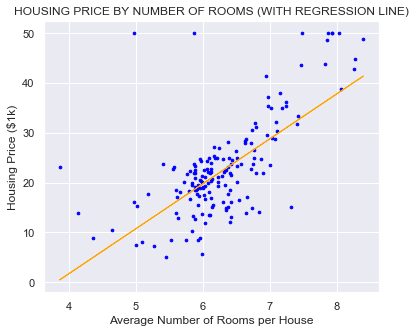

In [27]:
plt.scatter(X_test, Y_test,  color='blue',s=7)
plt.plot(X_test, y_test_predict, color='orange', linewidth=1)
plt.xlabel("Average Number of Rooms per House")
plt.ylabel("Housing Price ($1k)")
plt.title("HOUSING PRICE BY NUMBER OF ROOMS (WITH REGRESSION LINE)")

plt.show()


### 4.2 So many scatterplots!

Choose 8 out of the 14 features of the housing data that you think are most interesting to study.  Create an 8x8 grid of scatterplots showing how each of these variables relate to each other.  You want to produce something that looks generally like [this image](http://iogas.net/wp-content/gallery/iogas-evaluation/scatterplot-matrix-point-density.png).

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


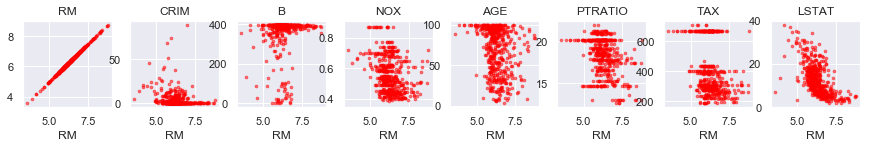

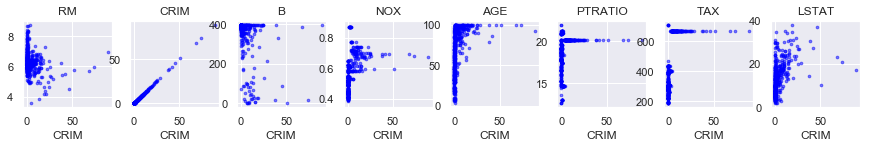

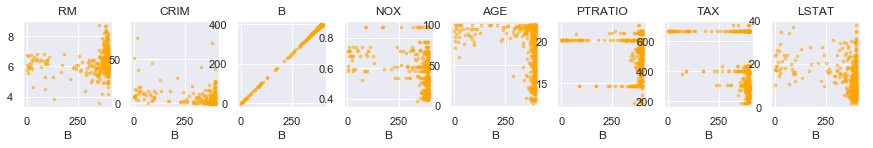

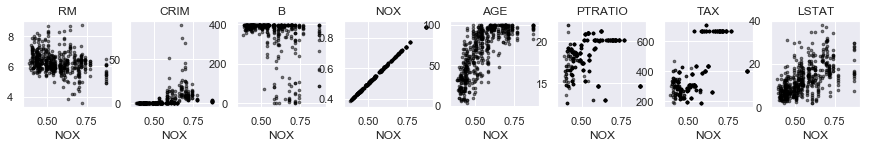

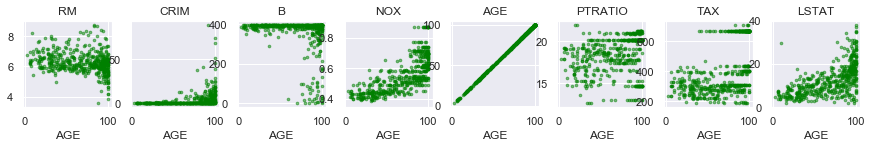

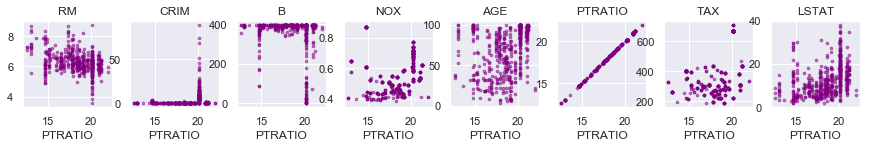

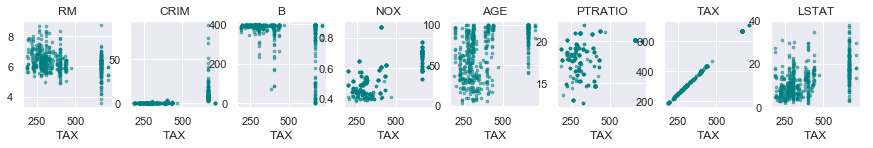

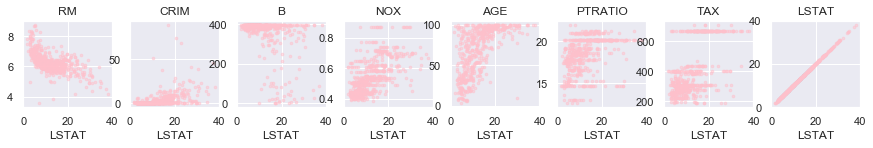

In [28]:
print(bdata.feature_names)
features = ['RM','CRIM','B','NOX','AGE','PTRATIO','TAX','LSTAT']
colors = ['red','blue','orange','black','green','purple','teal','pink']
assert(len(colors) >= len(features))

for i in range(len(features)):
    plt.figure(figsize=(15,15))
    for j in range(len(features)):
        plt.subplot(len(features), len(features), i * len(features) + j + 1)
        plt.scatter(data[features[i]], data[features[j]], alpha=0.5,color=colors[i],s=7.0)
        plt.xlabel(features[i])
        plt.title(features[j])
    plt.show()

### 4.3 PCA to the rescue

Run principal component analysis using [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from sklearn to find the first 12 principal components of your data.  Use only your training set (66% of the data), and use all features *except* the median housing price.  Create a figure showing how the amount of variance explained by your components increases as you increase the number of components from 1 to 12. *Note: shouldn't this be __decreases__?*

after scaling minimum [-0.48346219 -0.483697   -1.53820262 -0.25039154 -1.47879739 -3.92958419
 -2.28120117 -1.23310201 -0.9990265  -1.31198998 -2.56830084 -3.765406
 -1.49755367]


Text(0.5, 1.0, 'Variance Explained as Principal Components Increase')

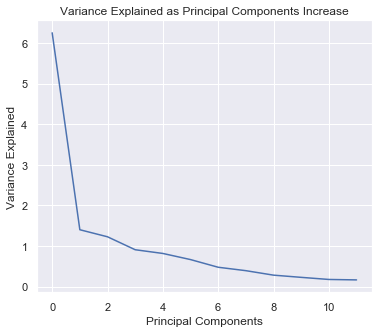

In [29]:
# Enter your code here
data = data.dropna()

feats = data.drop(columns=['TARGET'])
targ = data['TARGET']
X_train, X_test, y_train, y_test = train_test_split(feats,targ,test_size=0.33) 
#scale everything (taken from online!!)
scaler=StandardScaler()#instantiate
scaler.fit(X_train) # compute the mean and standard which will be used in the next command
X_scaled=scaler.transform(X_train)# fit and transform can be applied together and I leave that for simple exercise
# we can check the minimum and maximum of the scaled features which we expect to be 0 and 1
print ("after scaling minimum", X_scaled.min(axis=0))

ex_vars = []
for i in range(13):
    pca=PCA(n_components=i) 
    
    the_pca=pca.fit_transform(X_scaled)
    principalDf = pd.DataFrame(data = the_pca)
    finalDf = pd.concat([principalDf, y_train], axis = 1)
    #print(finalDf.head())
    ex_vars.append(pca.explained_variance_)

finals = ex_vars[12]
finals
plt.plot(finals)
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.title("Variance Explained as Principal Components Increase")

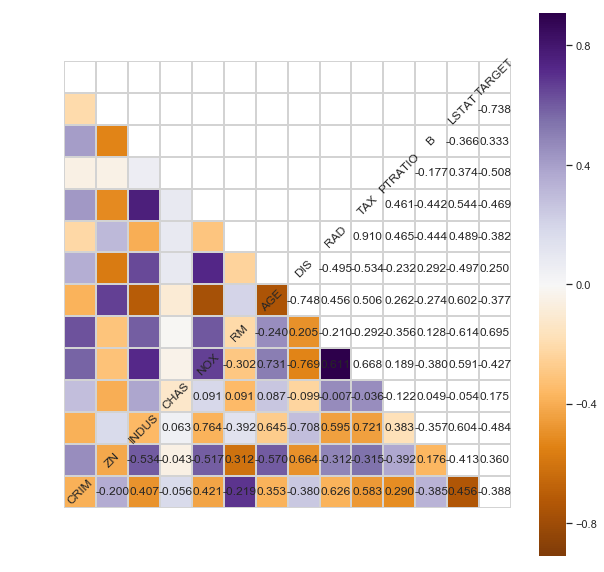

In [30]:
#https://stackoverflow.com/questions/43507756/python-seaborn-how-to-replicate-corrplot
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

### 4.4 Visualizing the components

Create a 1X3 grid containing three scatter plots of your training data:

1. PCA 1 vs. PCA 2 (you will need to use `fit_transform` to project your training data onto these two components)
2. PCA 1 (x-axis) vs. median housing value
3. PCA 2 vs. median housing value

          0         1         2         3         4         5         6  \
0  1.867954  0.957307 -1.265914 -0.016547 -0.489023  0.012243 -0.835805   
1  3.056210  0.007883  0.618180 -0.053835 -0.440030 -1.364754 -0.109385   
2 -0.089280  0.189632 -1.508377  0.273434 -0.643003  0.442076  0.248613   
3 -3.266512 -1.524548  0.418380  0.452112  0.271173 -0.450017 -0.582908   
4 -3.486312 -1.193257  0.431410 -0.119402  2.163334 -0.369971 -0.544425   

          7         8         9        10        11  TARGET  
0 -1.053687  0.858635 -0.604248 -0.642427 -0.153616    24.0  
1 -0.616861 -0.358428 -0.401304 -0.430762 -0.330142     NaN  
2 -0.877568 -0.117716  0.219070  0.356964  0.437593    34.7  
3 -0.684145  1.181929  0.903009 -0.654183 -0.104703     NaN  
4 -0.289365  0.279445  0.750636  0.181567 -0.470514    36.2  


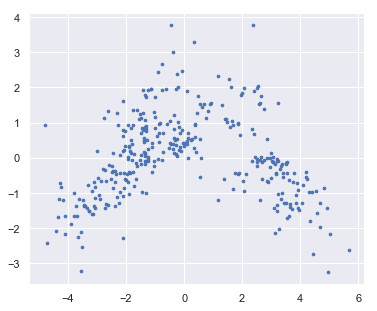

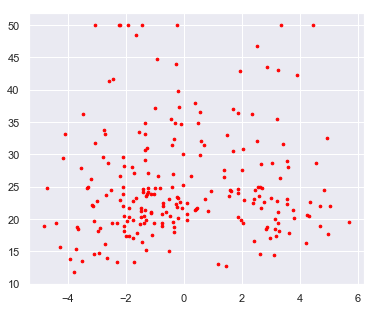

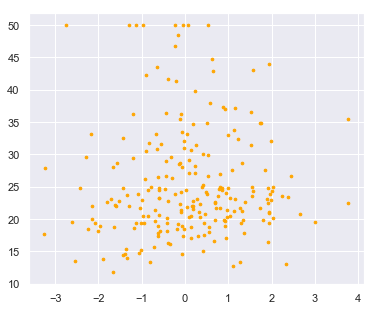

In [31]:
# Enter your code here
print(finalDf.head())
pca1=finalDf[0]

pca2 = finalDf[1]

plt.scatter(pca1,pca2,s=7)
plt.show()
plt.scatter(pca1,finalDf['TARGET'],color="red",s=7)
plt.show()
plt.scatter(pca2,finalDf['TARGET'],color="orange",s=7)
plt.show()

### 4.5 Regression and PCA

Using just the first Principal Component learned on the training data, project all of your data (including the test data) onto this 1-dimensional subspace using the `fit_transform` function.  Now, using your training data, fit a regression of median housing price on this first principal component of your data.  Report the RMSE of this regression for both the training and test set.  How do these results compare to your results from 4.1?  Interpret your results!

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data[['RM','CRIM','B','NOX','AGE','PTRATIO','TAX','LSTAT']],data['TARGET'],test_size=0.33) 

model = LinearRegression()
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))


print('USING ACTUAL FEATURES')
print('-------------------------------------------------------------------------')
print('RMSE TRAIN is {}'.format(rmse))

print("\n")

# on the test set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))


print('RMSE TEST is {}'.format(rmse))
print("\n")


#just the first principal component
pca=PCA(n_components=2) 

the_pca=pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = the_pca)
finalDf = pd.concat([principalDf, y_train], axis = 1)
finalDf = finalDf.dropna()

X_train, X_test, y_train, y_test = train_test_split(np.array(finalDf[0]).reshape(-1,1),finalDf['TARGET'],test_size=0.33) 

model = LinearRegression()
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))


print('USING ONE PRINCIPAL COMPONENT')
print('-------------------------------------------------------------------------')
print('RMSE TRAIN is {}'.format(rmse))

print("\n")

# on the test set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))


print('RMSE TEST is {}'.format(rmse))

USING ACTUAL FEATURES
-------------------------------------------------------------------------
RMSE TRAIN is 5.095840754827984


RMSE TEST is 5.19000053252592


USING ONE PRINCIPAL COMPONENT
-------------------------------------------------------------------------
RMSE TRAIN is 7.969198610485855


RMSE TEST is 8.33372036876821


Somehow we did WORSE using the first principal component than when we fit this with the regular features. I have no idea why, and would appreciate some feedback! I'm really confused as to why!